<a href="https://colab.research.google.com/github/lindyco/Colab/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simple program to train and test the data from Sklearn to predict the species of Iris.
It implements the LogisticRegression model to training the data.
The result of the prediction is 100% correct.

I also implemented the linear regression and Neural Network model to the program, and comapre the different between three of them.

In [1]:
# Import the library that I need
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd 

In [2]:
# Loading the data to X and y
# Then I print the X and y out to see what is the data looks like
X, y = load_iris(return_X_y=True)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In this case, print data doesn't tell me what is each column or rows mean, therefore, I use seaborn to load the dataset to define a proper ordering for categorical variables.

In [4]:
data = sns.load_dataset('iris')
data.head()
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


After I print the dataset, and compare to the X and y I have before, X include column sepal_length, sepal_width, petal_length and petal_, which is everything expect the lats column.
y should be corresponde to different sepecis, there are three number, 0, 1 and 2, but we only see two species, so I implement pandas to see the middle of the row.

In [5]:
df = pd.DataFrame(data)
display(df.iloc[40:60]) 

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
43,5.0,3.5,1.6,0.6,setosa
44,5.1,3.8,1.9,0.4,setosa
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


Base on the information, 0 = setosa, 1 = versicolor, and 2 = virginica in y

Text(0, 0.5, 'Sepcies')

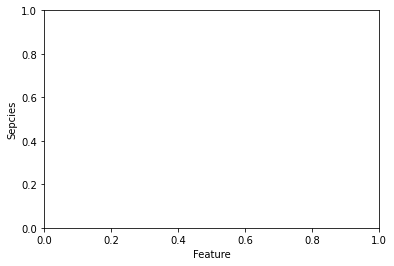

In [6]:
# After get to knowing this data, I start to make plot to represent the relationship between each feature and species
# X as my feature, and the y is sepcies like itself
plt.xlabel("Feature")
plt.ylabel("Sepcies")

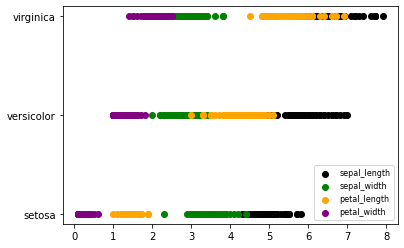

In [7]:
# Import the data to the plot
# Each feature is corresponde to different sepcies
# And I used scatter for the plot

pltX = data.loc[:,'sepal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'black', Label = 'sepal_length')

pltX = data.loc[:,'sepal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'green', Label = 'sepal_width')

pltX = data.loc[:,'petal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'orange', Label = 'petal_length')

pltX = data.loc[:,'petal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'purple', Label = 'petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

The grapy shows the relationship between sepcies and features include sepal_length, sepal_width, petal_length and petal_width.

The next step is build up the model to train data and test data
I set 80% data to training and 20% to testing

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Build the model with Logistic Regression.

In [9]:
#Import the library that I need for logistic regression.
from sklearn.linear_model import LogisticRegression

In [10]:
#Trainning and teesting data
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


This list is the result of prediction, 0 is setosa, 1 is versicolor and 2 is virginica.
Now, I want to see how precise and accurate it is

In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



From this report, the precision, accuracy, recall so on are 1.00, which means, there is 100% correct for the prediction hit the target.

---------------------------------------------------------------------------------

Build model with linear Regression.

In [12]:
# Import the Library that I need.

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
model_Linear = linear_model.LinearRegression()

In [14]:
# Fitting the model with trainning data
model_Linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Now we can make the prediction by this linear Regression model
predictions_Linear = model_Linear.predict(x_test)
print(predictions_Linear)

[ 1.23071715 -0.04010441  2.21970287  1.34966889  1.28429336  0.02248402
  1.05726124  1.82403704  1.36824643  1.06766437  1.70031437 -0.07357413
 -0.15562919 -0.06569402 -0.02128628  1.39659966  2.00022876  1.04812731
  1.28102792  1.97283506  0.03184612  1.59830192  0.09450931  1.91807547
  1.83296682  1.87877315  1.78781234  2.03362373  0.03594506  0.02619043]


Compare the predictions between the linear regression and logistic regression, One is ouput floating point and the other is ouput the integer.
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]( Result of logistic regression)

In [16]:
# Now I want to see how the performance of this linear regression
print("coefficients: ", model_Linear.coef_)
print("Intercept: ",model.intercept_ )
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, predictions_Linear))
print("Coefficients of determination (R^2): %.2f" % r2_score(y_test, predictions_Linear))

coefficients:  [-0.11633479 -0.05977785  0.25491375  0.54759598]
Intercept:  [  9.03252831   1.84062834 -10.87315665]
Mean squared error (MSE): 0.04
Coefficients of determination (R^2): 0.95


From this performance, the model is good for prediction, the mean square error is 0.04(The smaller the means squared error, the closer you are to finding the line of best fit).
And the coefficients of determination is 0.95(Generally, a higher coefficient indicates a better fit for the model).
However, the result is formatting by floating point, it is less clear and visual compare to logistic regression.

--------------------------------------------------------------------------------


Build model with Neural Network

Import the library that Neural Network model needs

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn import preprocessing

In [18]:
# Redefine and split the data
iris = load_iris()
x_Neural = iris['data']
y_Neural = to_categorical(iris['target'])
x_train, x_test, y_train, y_test = train_test_split(x_Neural, y_Neural, test_size=0.2, random_state=42)

In [19]:
model_Neural = Sequential()

# Add layout,
# Since we have 4 different attribute,input dimemtion is 4 and use rectified linear unit activation function(relu) and softmax function.

model_Neural.add(Dense(6, input_dim = 4, activation='relu'))
model_Neural.add(Dense(3, activation='softmax'))
model_Neural.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [20]:
#fitting the model
model_Neural.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 200, batch_size = 10)

Epoch 1/200
12/12 [==============================] - 1s 58ms/step - loss: 1.3121 - accuracy: 0.3251 - val_loss: 1.1477 - val_accuracy: 0.3667
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 1.2471 - accuracy: 0.3012 - val_loss: 1.0865 - val_accuracy: 0.3667
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 1.0970 - accuracy: 0.3332 - val_loss: 1.0448 - val_accuracy: 0.3667
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 1.0921 - accuracy: 0.3619 - val_loss: 1.0142 - val_accuracy: 0.4000
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 1.0612 - accuracy: 0.4392 - val_loss: 0.9896 - val_accuracy: 0.4333
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0426 - accuracy: 0.4766 - val_loss: 0.9697 - val_accuracy: 0.4667
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0033 - accuracy: 0.5925 - val_loss: 0.9535 - val_accuracy: 0.5667
Epoch 8/200


In [21]:
predictions_Neural = model_Neural.predict(x_test)
print(predictions_Neural)

[[3.7978103e-03 8.6120403e-01 1.3499807e-01]
 [9.9060458e-01 9.3952827e-03 1.4450583e-07]
 [1.8208317e-08 8.9576542e-03 9.9104226e-01]
 [2.4461308e-03 7.2704881e-01 2.7050501e-01]
 [1.2253715e-03 7.3966378e-01 2.5911093e-01]
 [9.7954822e-01 2.0450491e-02 1.2709691e-06]
 [2.7865594e-02 9.0389848e-01 6.8235897e-02]
 [1.3215315e-05 9.2098005e-02 9.0788877e-01]
 [1.6458027e-04 2.6622134e-01 7.3361403e-01]
 [1.3088387e-02 8.9236885e-01 9.4542705e-02]
 [1.5347372e-04 3.1083828e-01 6.8900824e-01]
 [9.8482972e-01 1.5169456e-02 7.9123089e-07]
 [9.9232930e-01 7.6705911e-03 1.3143298e-07]
 [9.8531473e-01 1.4684730e-02 6.2639901e-07]
 [9.9126148e-01 8.7383799e-03 1.5337713e-07]
 [3.3907248e-03 8.1800956e-01 1.7859966e-01]
 [2.9860960e-06 5.5400878e-02 9.4459617e-01]
 [1.1565516e-02 8.7988830e-01 1.0854624e-01]
 [4.2946162e-03 8.1661266e-01 1.7909271e-01]
 [1.8810114e-06 3.8531657e-02 9.6146643e-01]
 [9.8284572e-01 1.7153325e-02 9.8265537e-07]
 [3.5872468e-04 4.0652922e-01 5.9311205e-01]
 [9.788452